# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [5]:
n = 5
label_name = "stat7"
layers = [5]

epochs = 1000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [6]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [9]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 0.8753651678562164
Epoch 1, Loss 0.9983170032501221
Epoch 2, Loss 0.8509332835674286
Epoch 3, Loss 1.1175719797611237
Epoch 4, Loss 0.8638846278190613
Epoch 5, Loss 1.0176511704921722
Epoch 6, Loss 0.8578145503997803
Epoch 7, Loss 1.152470886707306
Epoch 8, Loss 0.8367914259433746
Epoch 9, Loss 1.1554367244243622
Epoch 10, Loss 1.032482773065567
Epoch 11, Loss 0.829016387462616
Epoch 12, Loss 1.1123542189598083
Epoch 13, Loss 0.8579600155353546
Epoch 14, Loss 0.8563159704208374
Epoch 15, Loss 0.8549608588218689
Epoch 16, Loss 1.090700387954712
Epoch 17, Loss 1.1725637018680573
Epoch 18, Loss 0.9809680283069611
Epoch 19, Loss 1.1911541819572449
Epoch 20, Loss 1.113111823797226
Epoch 21, Loss 0.8373145163059235
Epoch 22, Loss 0.9885521233081818
Epoch 23, Loss 1.154644399881363
Epoch 24, Loss 1.0037778615951538
Epoch 25, Loss 1.1976493299007416
Epoch 26, Loss 1.1788600981235504
Epoch 27, Loss 1.008662760257721
Epoch 28, Loss 0.841795802116394
Epoch 29, Loss 1.115639835596084

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

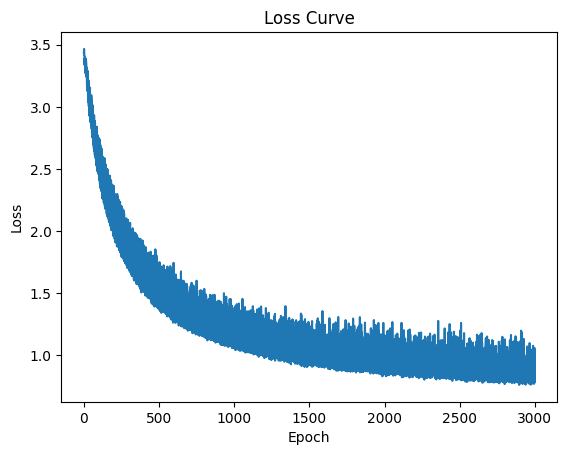

In [10]:
# # Print the loss curve
# Visualize the loss curve to ensure that the model is learning correctly. 
# Save the loss curve in `figures/` so that you can refer to them later.

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.savefig(f"figures/{label_name}_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

No examples for class 0
Accuracy for class 1 = 37.5%
Accuracy for class 2 = 33.333333333333336%
Accuracy for class 3 = 42.857142857142854%
No examples for class 4
Overall accuracy = 37.5%
Accuracy for class 0 = 100.0%
Accuracy for class 1 = 77.77777777777777%
Accuracy for class 2 = 68.42105263157895%
Accuracy for class 3 = 73.6842105263158%
Accuracy for class 4 = 100.0%
Overall accuracy = 71.875%


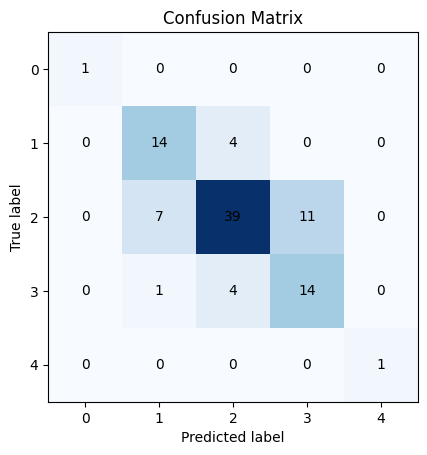

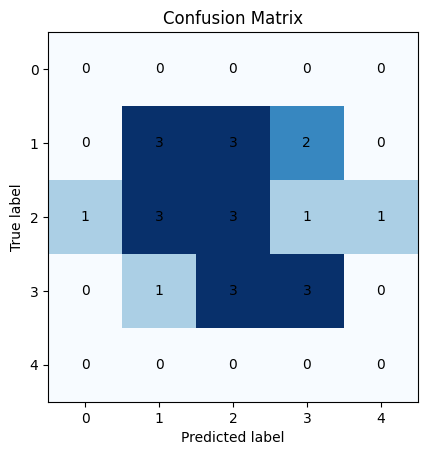

In [11]:
# Evaluate the model
# Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.
# No need to save plots or confusion matrix in this step.
# Code below:
conf_matrix_train = evaluate_model(model, training_dataset)
conf_matrix_test = evaluate_model(model, test_dataset)
conf_matrix_test.print_accuracy()
conf_matrix_train.print_accuracy()
conf_matrix_train.plot()
conf_matrix_test.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

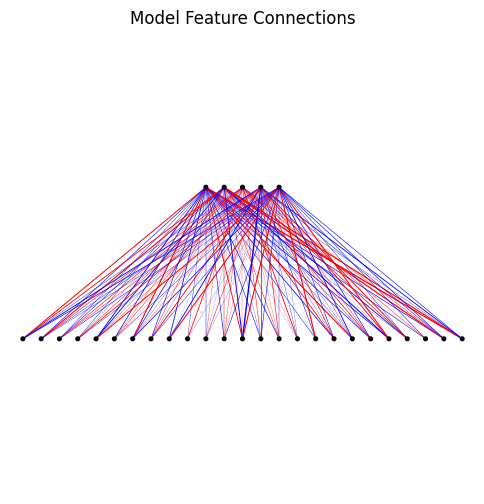

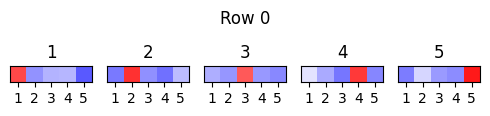

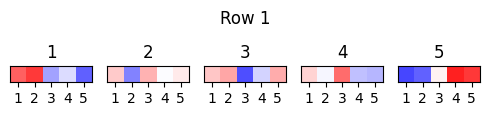

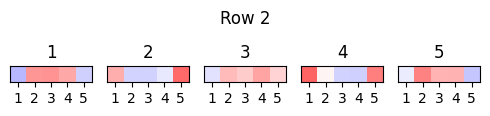

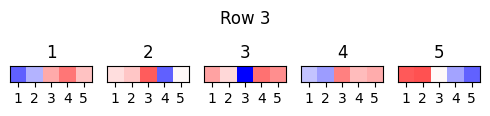

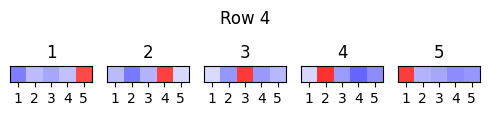

In [12]:
# Plot the model weights and connections in order to attempt to interpret what the model is learning.
# No need to save the plot in this step.
# Code below:
model.plot_connections()
# Plot heatmap of all model weights for all layers and index
# loop through all layers and plot the heatmap of the weights for each layer
# No need to save the plot in this step.
# Code below:
for i in range(len(layers)):
    for j in range(layers[i]):
        model.plot_heatmap_feature(i, j)